In [16]:
import dynamiqs as dq
import jax.numpy as jnp
import jax.scipy.linalg as jla
import matplotlib.pyplot as plt

In [17]:
N = 20
alpha = 2
omega_r = 4
psi_r = dq.coherent(N,alpha)
squeezer = dq.squeeze(N,.5)
psi_r = squeezer @ psi_r
rho_r = dq.todm(psi_r)
a = dq.destroy(N)
a_dag = dq.create(N)
n = dq.number(N)

H_res = omega_r*n
kappa = 0
collapse = jnp.sqrt(kappa)*a

times = jnp.linspace(0,10,1000)

In [18]:
me_res = dq.mesolve(H_res,[collapse],rho_r,times,exp_ops=[n,a])

|██████████| 100.0% ◆ elapsed 838.01ms ◆ remaining 0.00ms  


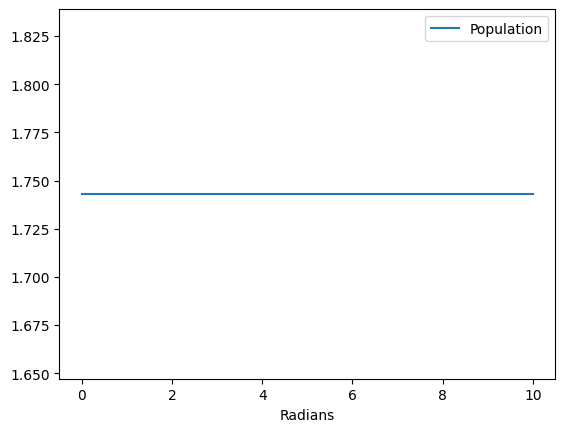

In [19]:
alpha_t = me_res.expects[1]
n_t = me_res.expects[0]
rho_t = me_res.states
plt.plot(times,jnp.real(n_t),label="Population")
plt.legend()
plt.xlabel("Radians")
plt.show()

100%|██████████| 250/250 [00:19<00:00, 12.60it/s]


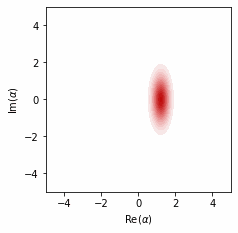

In [20]:
dq.plot_wigner_gif(
  states=rho_t,
  gif_duration=10,
  fps=25,
  npixels=200,
  filename="squeezed_res.gif")